In [28]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [6]:
trump_tweets = pd.read_csv('/Users/keremsmacbook/Desktop/42/gitHub/Presidential_Tweets_Impacts_SP500/PresidentialTweetsImpectOnS&P500/Data/Raw/DonaldTrumpTweets.csv')

trump_tweets['date'] = pd.to_datetime(trump_tweets['date'])

trump_tweets_presidency = trump_tweets[
    (trump_tweets['date'] >= '2017-01-01') & (trump_tweets['date'] <= '2021-01-01')]

trump_tweets_presidency.to_csv('cleaned_trump_tweets.csv', index=False)

In [5]:
sp500_data = pd.read_csv('/Users/keremsmacbook/Desktop/42/gitHub/Presidential_Tweets_Impacts_SP500/PresidentialTweetsImpectOnS&P500/Data/Raw/SP500_IndexCloses.csv', index_col=0)

sp500_data.index = pd.to_datetime(sp500_data.index)

sp500_data_presidency = sp500_data[
    (sp500_data.index >= '2017-01-01') & (sp500_data.index <= '2021-01-01')
    ]

sp500_data_presidency.to_csv('cleaned_sp500_index_prices.csv')

In [7]:
daily_tweet_counts = trump_tweets_presidency.groupby(trump_tweets_presidency['date'].dt.date).size()
daily_tweet_counts = daily_tweet_counts.reset_index(name='tweet_count')

daily_tweet_counts['date'] = pd.to_datetime(daily_tweet_counts['date'])

aligned_data = pd.merge(
    sp500_data_presidency,
    daily_tweet_counts,
    left_index=True,
    right_on='date',
    how='inner'
)

aligned_data.to_csv('aligned_data.csv', index=False)

In [26]:
missing_closes = aligned_data['Close'].isnull()

print(f"Number of missing rows in 'Close': {missing_closes.sum()}")

missing_tweets = aligned_data['tweet_count'].isnull()
print(f"Number of missing rows in 'tweet_count': {missing_tweets.sum()}")

Number of missing rows in 'Close': 0
Number of missing rows in 'tweet_count': 0


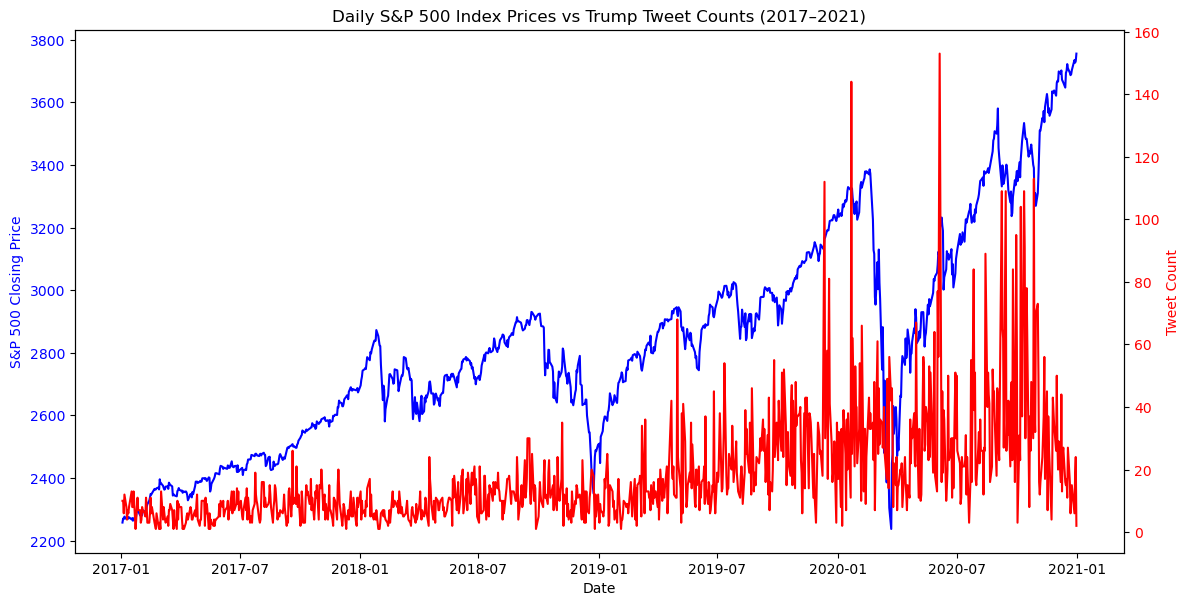

Plot saved as: /Users/keremsmacbook/Desktop/42/gitHub/Presidential_Tweets_Impacts_SP500/PresidentialTweetsImpectOnS&P500/Outputs/Plots/sp500_closing_indexes_vs_tweet_counts.png


In [29]:
fig, ax1 = plt.subplots(figsize=(12, 6)) 

ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500 Closing Price', color='blue')
ax1.plot(aligned_data['date'], aligned_data['Close'], color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Tweet Count', color='red')
ax2.plot(aligned_data['date'], aligned_data['tweet_count'], color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.xticks(rotation=45, ha='right')  

fig.tight_layout()
plt.title('Daily S&P 500 Index Prices vs Trump Tweet Counts (2017–2021)')

output_dir = '/Users/keremsmacbook/Desktop/42/gitHub/Presidential_Tweets_Impacts_SP500/PresidentialTweetsImpectOnS&P500/Outputs/Plots'

os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'aligned_data_closing_prices_vs_tweet_counts.png')
plt.savefig(output_path)
plt.show()

print(f"Plot saved as: {plot_path}")